# Video Game Sales Dataset Analysis

This notebook provides an initial exploration and analysis of a video game sales dataset loaded from a CSV file.

Dataset used: [Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

## 1. Import Required Libraries
Import pandas, numpy, matplotlib, and seaborn for data analysis and visualization.

In [201]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

## 2. Load the CSV Dataset
Use pandas to load the CSV file into a DataFrame. Update the file path as needed.

In [202]:
# Load the CSV Dataset
df = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')
print(f"Dataset loaded with shape: {df.shape}")

Dataset loaded with shape: (16719, 16)


## 3. Preview the Data
Display the first few rows of the DataFrame to get an overview of the data.

In [203]:
# Preview the Data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Check for Missing Values
Check for missing values in each column using isnull() and sum().

In [204]:
# Check for Missing Values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [205]:
# Drop the rows with invalid game names
df = df.dropna(subset=['Name'])
print(f"Dataset shape after dropping rows with null 'Name': {df.shape}")

Dataset shape after dropping rows with null 'Name': (16717, 16)


## 5. Basic Statistical Summary
Generate summary statistics for numerical columns using describe().

In [206]:
# Basic Statistical Summary
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## 6. Visualize Feature Distributions
Create histograms for key numerical features to visualize their distributions.

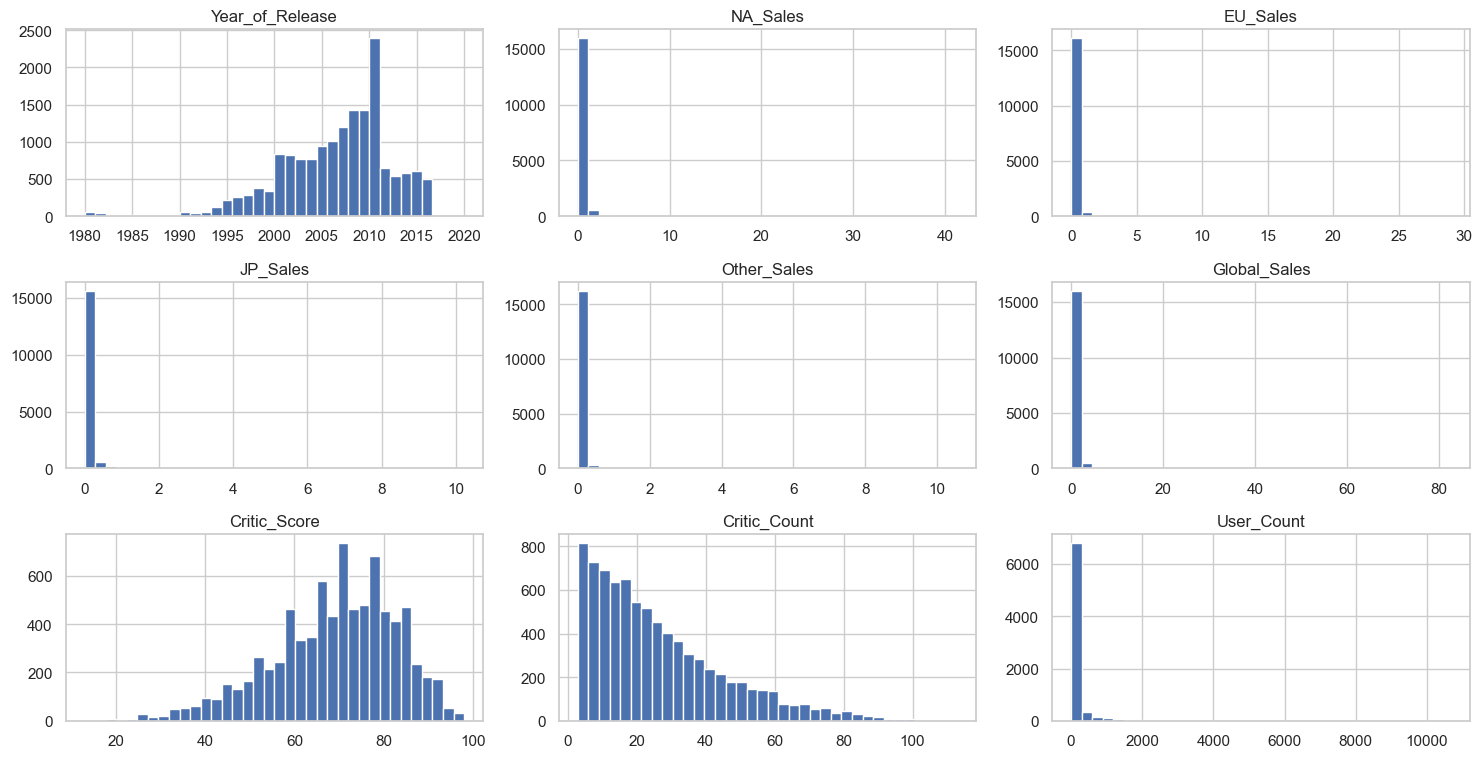

In [207]:
# Visualize Feature Distributions
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(bins=36, figsize=(15, 10), layout=(len(num_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()

### Question: What are the top best-selling video games in the dataset?

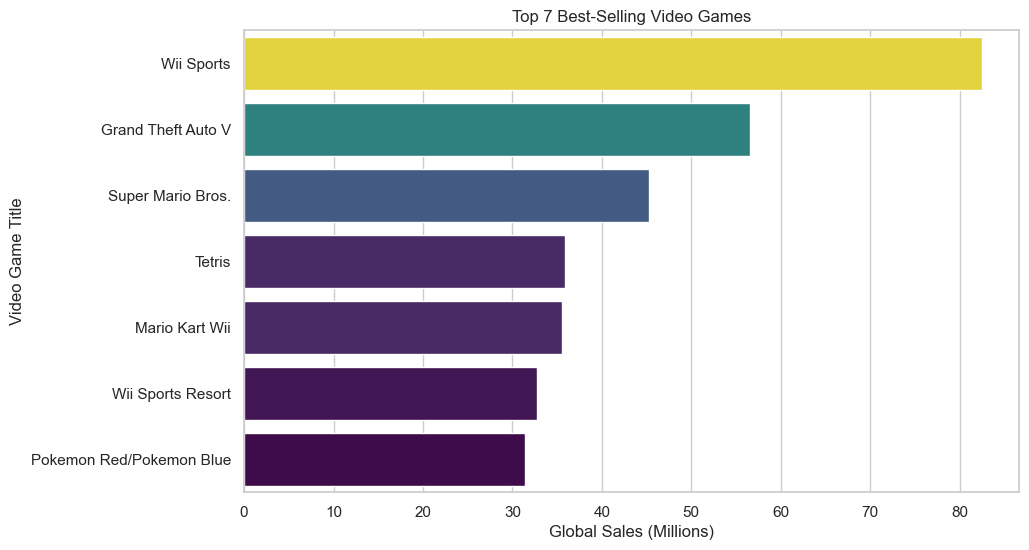

In [208]:
def show_best_selling_games(df, n=5):
    """
    Identify the top best-selling video games in the dataset.
    """
    dfg = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=dfg.values, y=dfg.index, hue=dfg.values, palette='viridis', legend=False)
    plt.title(f'Top {n} Best-Selling Video Games')
    plt.xlabel('Global Sales (Millions)')
    plt.ylabel('Video Game Title')
    plt.show()

show_best_selling_games(df, n=7)

### Question: Which publishers have the highest average global sales?

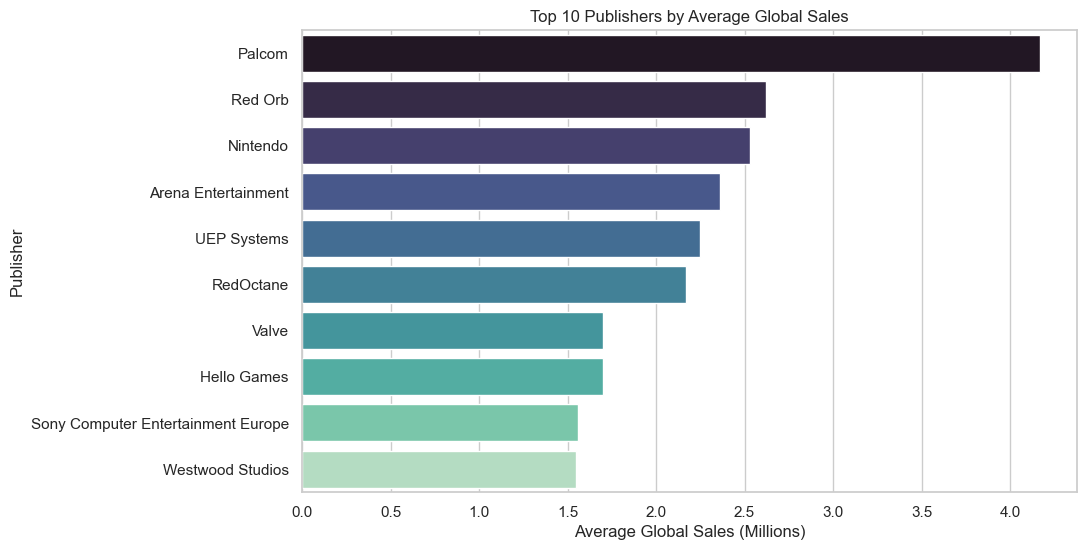

In [209]:
def show_top_publishers(df, n=10):
    """
    Find publishers with the highest average global sales.
    """
    top_publishers = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_publishers.values,
        y=top_publishers.index,
        hue=top_publishers.index,
        palette='mako',
        legend=False)
    plt.title(f'Top {n} Publishers by Average Global Sales')
    plt.xlabel('Average Global Sales (Millions)')
    plt.ylabel('Publisher')
    plt.show()

show_top_publishers(df, n=10)

### Question: How have video game sales trended over the years?

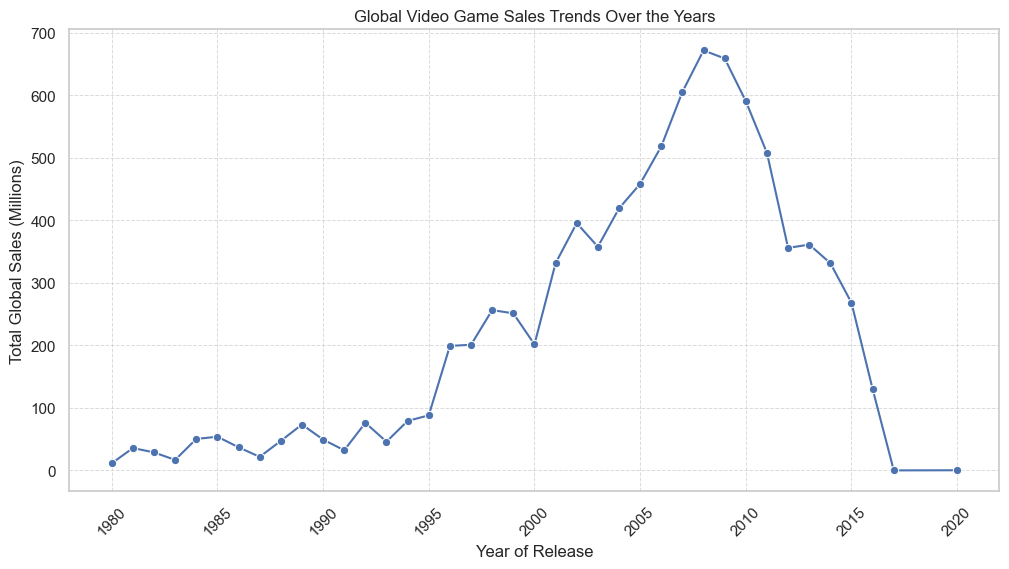

In [210]:
def show_sales_trends(df):
    """
    Analyze the trends in global video game sales over the years.
    """
    yearly_sales = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year_of_Release', y='Global_Sales', data=yearly_sales, marker='o')
    plt.title('Global Video Game Sales Trends Over the Years')
    plt.xlabel('Year of Release')
    plt.ylabel('Total Global Sales (Millions)')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.show()

show_sales_trends(df)

### Question: What are the top-selling genres globally and by region?

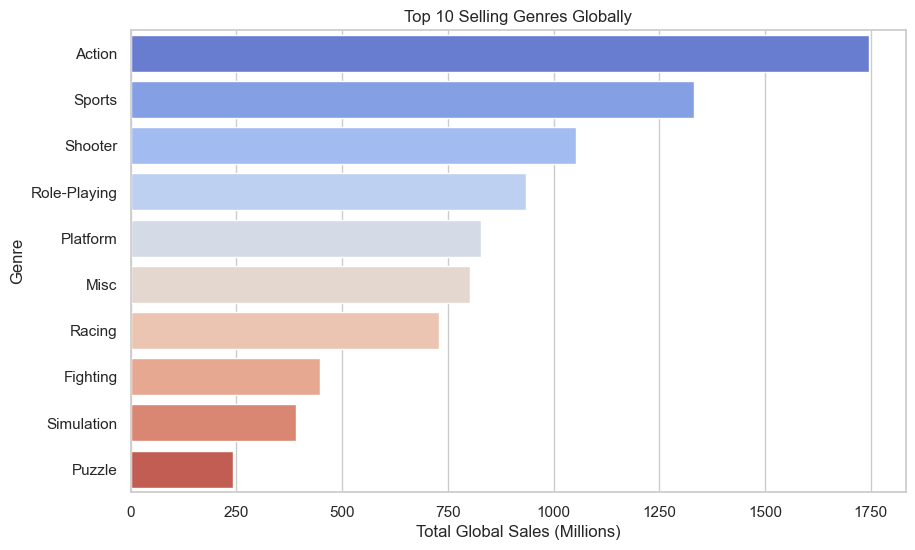

In [211]:
def show_top_selling_genres(df, n=10):
    """
    Identify the top-selling genres globally and by region.
    """
    genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_sales.values, y=genre_sales.index, hue=genre_sales.index, palette='coolwarm', legend=False)
    plt.title(f'Top {n} Selling Genres Globally')
    plt.xlabel('Total Global Sales (Millions)')
    plt.ylabel('Genre')
    plt.show()

show_top_selling_genres(df, n=10)

### Question: Which platforms have the most best-selling games?

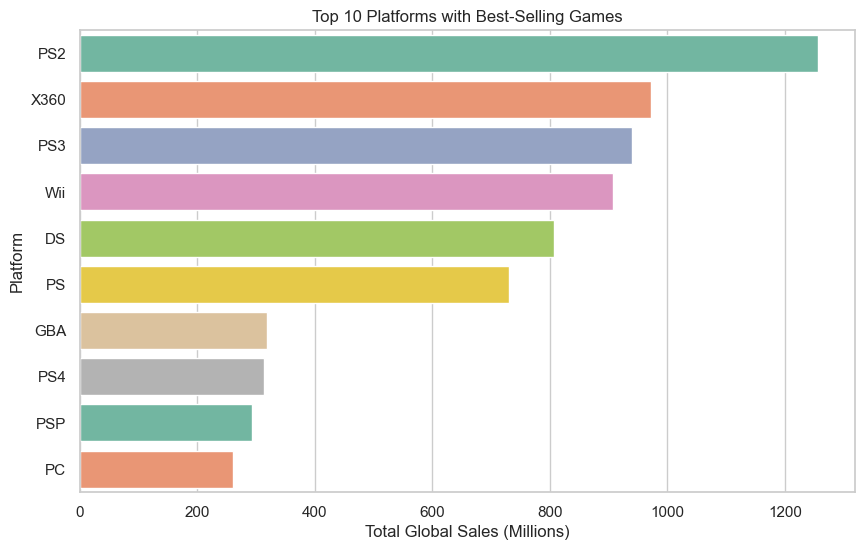

In [212]:
def show_best_selling_platforms(df, n=10):
    """
    Identify which platforms have the most best-selling games.
    """
    platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=platform_sales.values, y=platform_sales.index, hue=platform_sales.index, palette='Set2', legend=False)
    plt.title(f'Top {n} Platforms with Best-Selling Games')
    plt.xlabel('Total Global Sales (Millions)')
    plt.ylabel('Platform')
    plt.show()

show_best_selling_platforms(df, n=10)

### Question: Are there regional differences in top-selling games or genres?

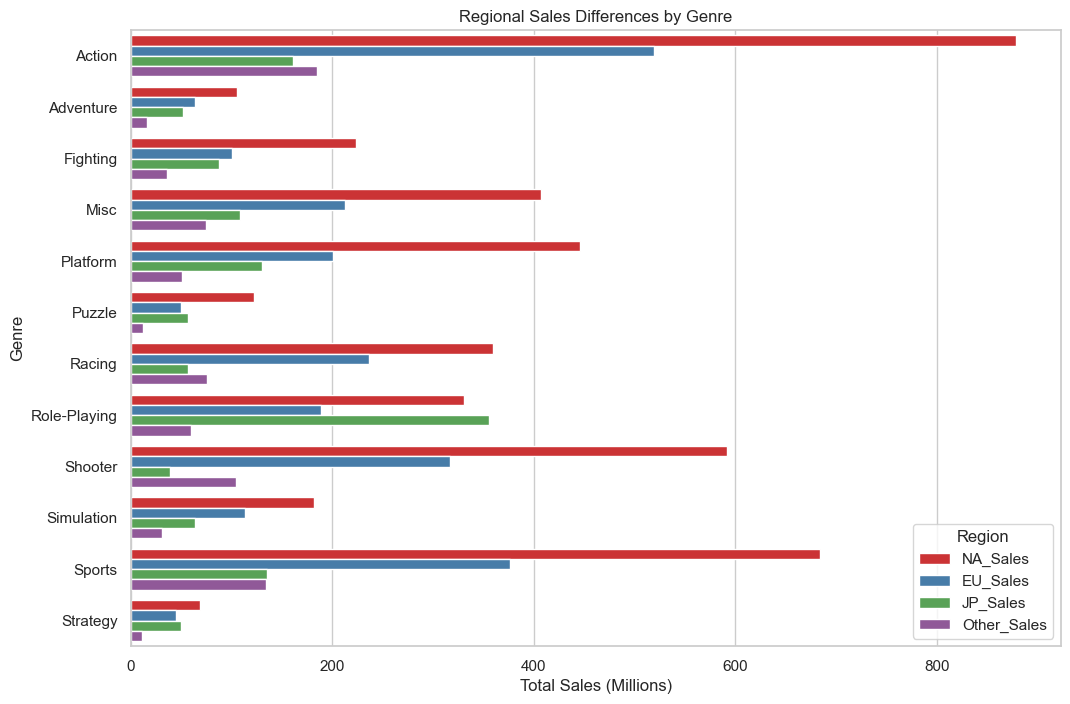

In [213]:
def show_regional_differences(df):
    """
    Analyze regional differences in top-selling games or genres.
    """
    regional_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
    regional_sales_melted = regional_sales.melt(id_vars='Genre', var_name='Region', value_name='Sales')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Sales', y='Genre', hue='Region', data=regional_sales_melted, palette='Set1')
    plt.title('Regional Sales Differences by Genre')
    plt.xlabel('Total Sales (Millions)')
    plt.ylabel('Genre')
    plt.legend(title='Region')
    plt.show()

show_regional_differences(df)

Japan seems to prefer role-playing games (RPGs) and action games, while North America has a strong preference for shooter and sports games. Europe shows a more balanced distribution across genres, with a slight preference for action and adventure games.

### Question: How do sales compare between different ESRB ratings?

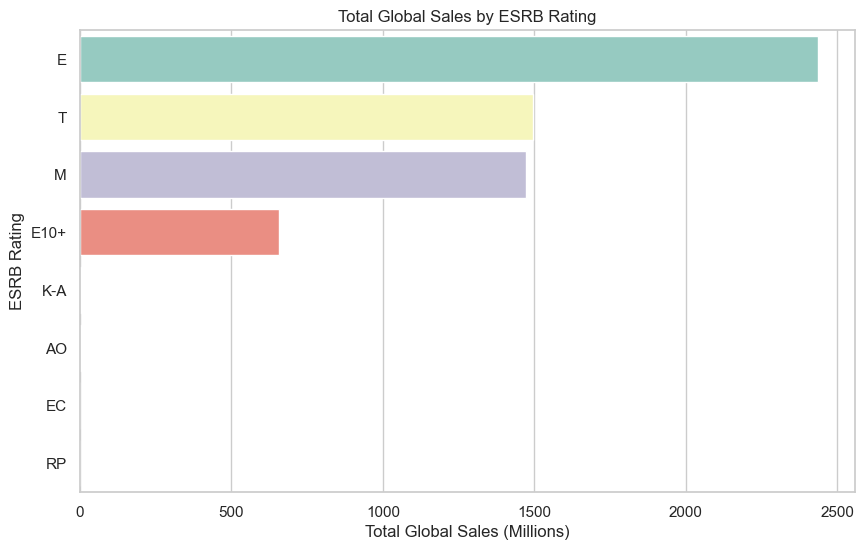

In [214]:
def show_sales_by_ratings(df):
    """
    Analyze how sales compare between different ESRB ratings.
    """
    rating_sales = df.groupby('Rating')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rating_sales['Global_Sales'], y=rating_sales['Rating'], hue=rating_sales['Rating'], palette='Set3', legend=False)
    plt.title('Total Global Sales by ESRB Rating')
    plt.xlabel('Total Global Sales (Millions)')
    plt.ylabel('ESRB Rating')
    plt.show()

show_sales_by_ratings(df)

Looks like the ESRB ratings with the highest global sales are 'E' (Everyone) and 'T' (Teen), indicating that games suitable for a wider audience tend to perform better in terms of sales. The 'M' (Mature) rating also shows significant sales, suggesting that there is a strong market for games targeted at older audiences as well.

### Question: What are the regional differences in ESRB ratings?

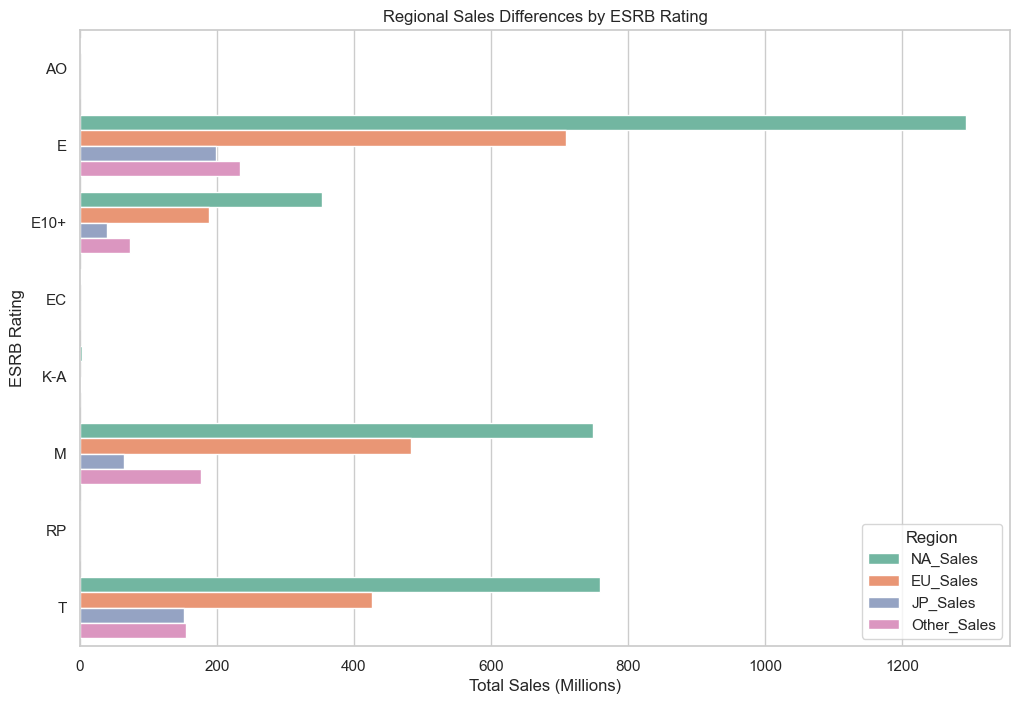

In [215]:
def show_regions_vs_esrb(df):
    """
    Analyze the regional differences in ESRB ratings.
    """
    region_rating_sales = df.groupby(['Rating'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
    region_rating_sales_melted = region_rating_sales.melt(id_vars='Rating', var_name='Region', value_name='Sales')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Sales', y='Rating', hue='Region', data=region_rating_sales_melted, palette='Set2')
    plt.title('Regional Sales Differences by ESRB Rating')
    plt.xlabel('Total Sales (Millions)')
    plt.ylabel('ESRB Rating')
    plt.legend(title='Region')
    plt.show()

show_regions_vs_esrb(df)

### Question: What is the distribution of sales among all games (e.g., do a few games dominate)?

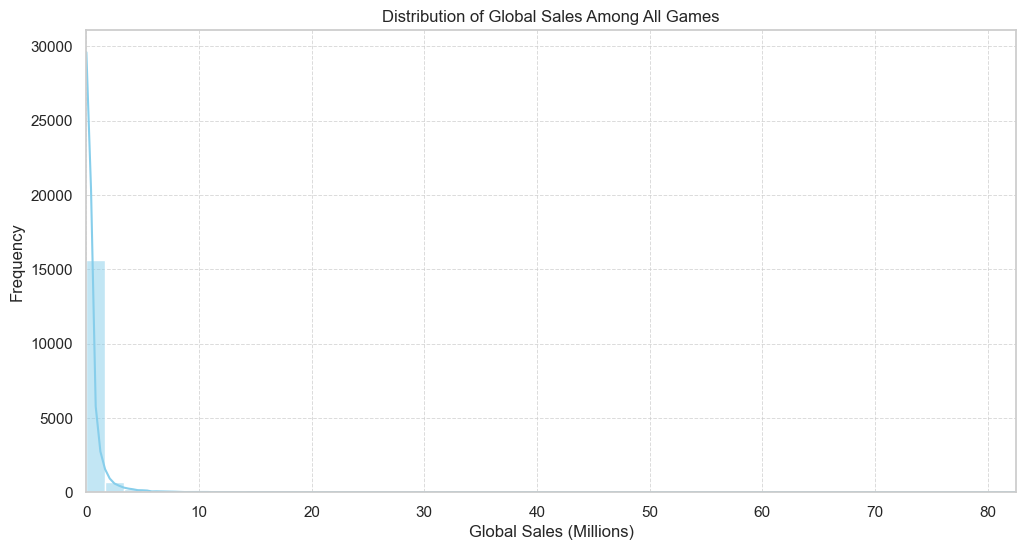

In [216]:
def show_distribution_sales(df):
    """
    Analyze the distribution of sales among all games to see if a few games dominate.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Global_Sales'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Global Sales Among All Games')
    plt.xlabel('Global Sales (Millions)')
    plt.ylabel('Frequency')
    plt.xlim(0, df['Global_Sales'].max())
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.show()
show_distribution_sales(df)

It looks like games with low global sales (0-5 million) are the most numerous, while a small number of games have very high global sales (over 20 million).

In [217]:
def print_sales_bins(df):
    highest_sales = df['Global_Sales'].max()
    bins = (highest_sales / 10.0) * np.arange(11)
    df_sales_bins = pd.cut(df['Global_Sales'], bins=bins)
    sales_bin_counts = df_sales_bins.value_counts().sort_index()
    print("Sales Bin Counts:")
    print(sales_bin_counts)


### Question: Which year had the most releases or highest sales?

In [218]:
year_with_most_releases = df['Year_of_Release'].value_counts().idxmax()
year_with_most_sales = df.groupby('Year_of_Release')['Global_Sales'].sum().idxmax()
print(f"Year with the most releases: {int(year_with_most_releases)}")
print(f"Year with the highest sales: {int(year_with_most_sales)}")


Year with the most releases: 2008
Year with the highest sales: 2008


### Question: How do the best sellers correlate with user reviews?

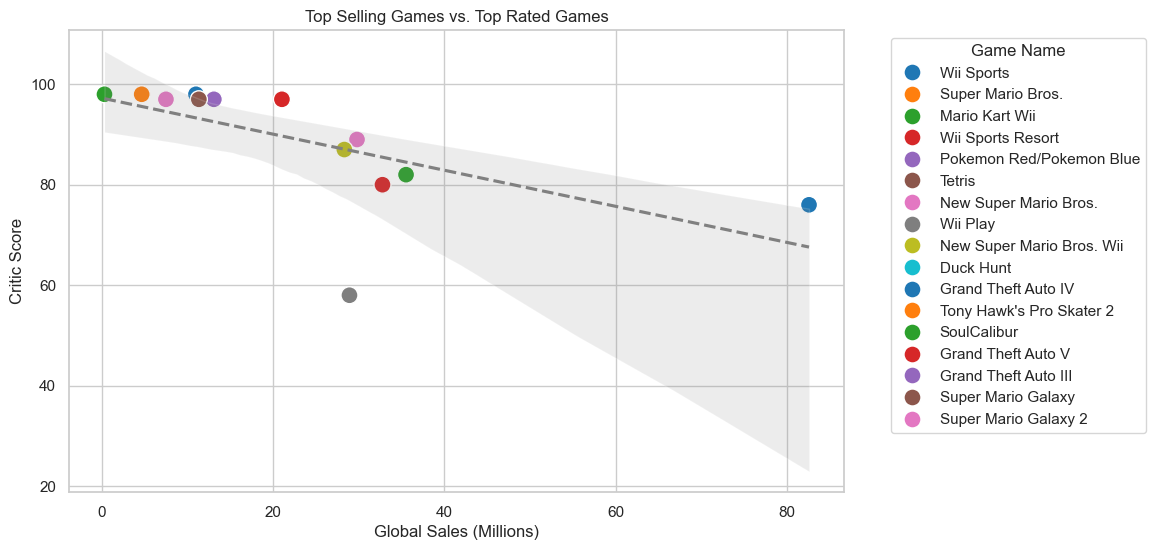

In [219]:
def show_top_selling_and_ratings(df, n=5, plot_regression=False):
    # Get top N best selling games
    top_selling_games = df.nlargest(n, 'Global_Sales')

    # Get top N top rated games (by Critic_Score, drop NaN)
    top_rated_games = df.dropna(subset=['Critic_Score']).nlargest(n, 'Critic_Score')

    # Combine for scatter plot
    combined = pd.concat([top_selling_games, top_rated_games]).drop_duplicates(subset=['Name'])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=combined,
        x='Global_Sales',
        y='Critic_Score',
        hue='Name',
        s=150,
        palette='tab10'
    )
    if plot_regression:
        sns.regplot(data=combined, x='Global_Sales', y='Critic_Score', scatter=False, color='gray', line_kws={'linestyle':'--'})
    plt.title('Top Selling Games vs. Top Rated Games')
    plt.xlabel('Global Sales (Millions)')
    plt.ylabel('Critic Score')
    plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

show_top_selling_and_ratings(df, n=10, plot_regression=True)

So it looks like the better selling a game is, its critic score tends to be high, but the trend shows they are not directly correlated, as some games with high sales have lower critic scores and vice versa.